### Importing all necessary libraries

In [21]:
# Basic analysis library

import sys
import numpy as np
import pandas as pd

In [82]:
# Visualization libraries

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

In [83]:
# Ignoring warnings

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [84]:
# Loading dataset

df = pd.read_csv("House_Price.csv")

In [85]:
# Getting 10 random samples

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Preprocessing

In [86]:
#Number of rows and columns

df.shape

(1460, 81)

In [87]:
# Displaying the number of entries, the names of the column attributes, the data type and the memory space used

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
#Columns in our dataset

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* We can see a lot of columns in our dataset.
* We see that some of the features having int data type consists of discrete values.
* If the features have discrete values , it's better to change them into categorical variables that will help us in better analysis.

In [89]:
#Description of our dataset

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
#Drop Id column as it is not required

df.drop(columns=['Id'],axis=1,inplace=True)

In [91]:
#let's see if our dataset contains missing values.

df.isna().sum().sum()

6965

* 6965 is a big number that tells us there are a lot of missing values in train dataset

In [92]:
# check the missing value in training data
missing_train = df.isnull().sum().sort_values(ascending = False)
missing_train

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

Text(0.5, 1.0, 'Missing value in trianing data')

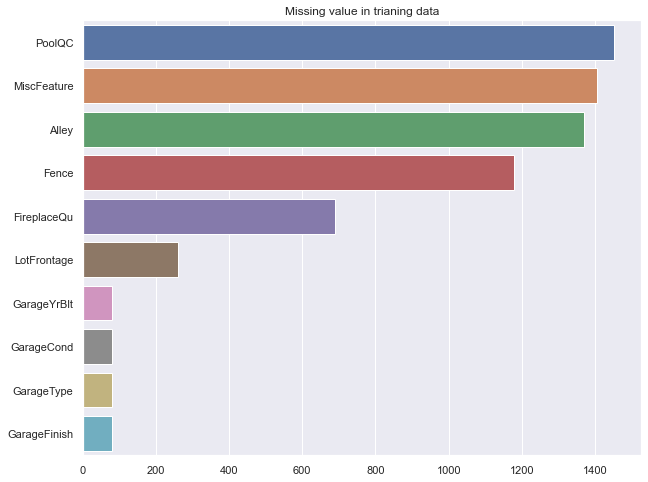

In [93]:
#plot the top 10 missing values
missing_x_axis = missing_train[:10]
missing_y_axis = missing_train[:10].index
width = 10
height = 8
plt.figure(figsize=(width, height))

sns.barplot(missing_x_axis, missing_y_axis)
plt.title('Missing value in trianing data')

The plot above illustrate that there are plenty of variables are missing value.

Before we proceed to deeper analysis, we need to have a look at these missing variables during the process of EDA. After that, I am going to apply feature engineering to deal with those missing value and make more correlated variables to make a accurate prediction model.

### Filling the missing values

For a few columns there is lots of NaN entries. However, reading the data description we find this is not missing data: For example, PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [94]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df[col].fillna('None',inplace=True)
    df[col].fillna('None',inplace=True)

In [95]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
cols_fillna = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for col in cols_fillna:
    df[col].fillna(df[col].mean(), inplace=True)
    df[col].fillna(df[col].mean(), inplace=True)

In [96]:
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Missing Values Total', 'Percent'])
missing_data.head()

,Missing Values Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


Like the target variable, some of the feature values are not normally distributed and it is therefore better to use log values in both training and test data.

### Target Feature

#### Sale Price

In [97]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Our target feature is a continuous variable with values ranging from 34900 to 755000.
* The average sale price of all the houses in our dataset is 180921.

### Numerical Analysis

* There are two types of numerical features
* Discrete and Continuous
* If there are discrete features in our dataset, we need to separate them and analyze as categorical variables.
* Because if they are included in numerical analysis , we won't find any correlation between discrete features and target feature.
* First step , we separate discrete features

In [98]:
discrete=[]
for col in df.columns:
    if df[col].dtype=='int64' and len(df[col].unique()) <=15:
        discrete.append(col)

#### Discrete Numerical Analysis

In [99]:
print("Discrete Features :: \n\n{}".format(discrete))

Discrete Features :: 

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


In [100]:
#Let's have a look at the unique values of each of these features
for col in discrete:
    print("{} has {} unique values.".format(col,df[col].unique()))

MSSubClass has [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] unique values.
OverallQual has [ 7  6  8  5  9  4 10  3  1  2] unique values.
OverallCond has [5 8 6 7 4 2 3 9 1] unique values.
BsmtFullBath has [1 0 2 3] unique values.
BsmtHalfBath has [0 1 2] unique values.
FullBath has [2 1 3 0] unique values.
HalfBath has [1 0 2] unique values.
BedroomAbvGr has [3 4 1 2 0 5 6 8] unique values.
KitchenAbvGr has [1 2 3 0] unique values.
TotRmsAbvGrd has [ 8  6  7  9  5 11  4 10 12  3  2 14] unique values.
Fireplaces has [0 1 2 3] unique values.
GarageCars has [2 3 1 0 4] unique values.
PoolArea has [  0 512 648 576 555 480 519 738] unique values.
MoSold has [ 2  5  9 12 10  8 11  4  1  7  3  6] unique values.
YrSold has [2008 2007 2006 2009 2010] unique values.


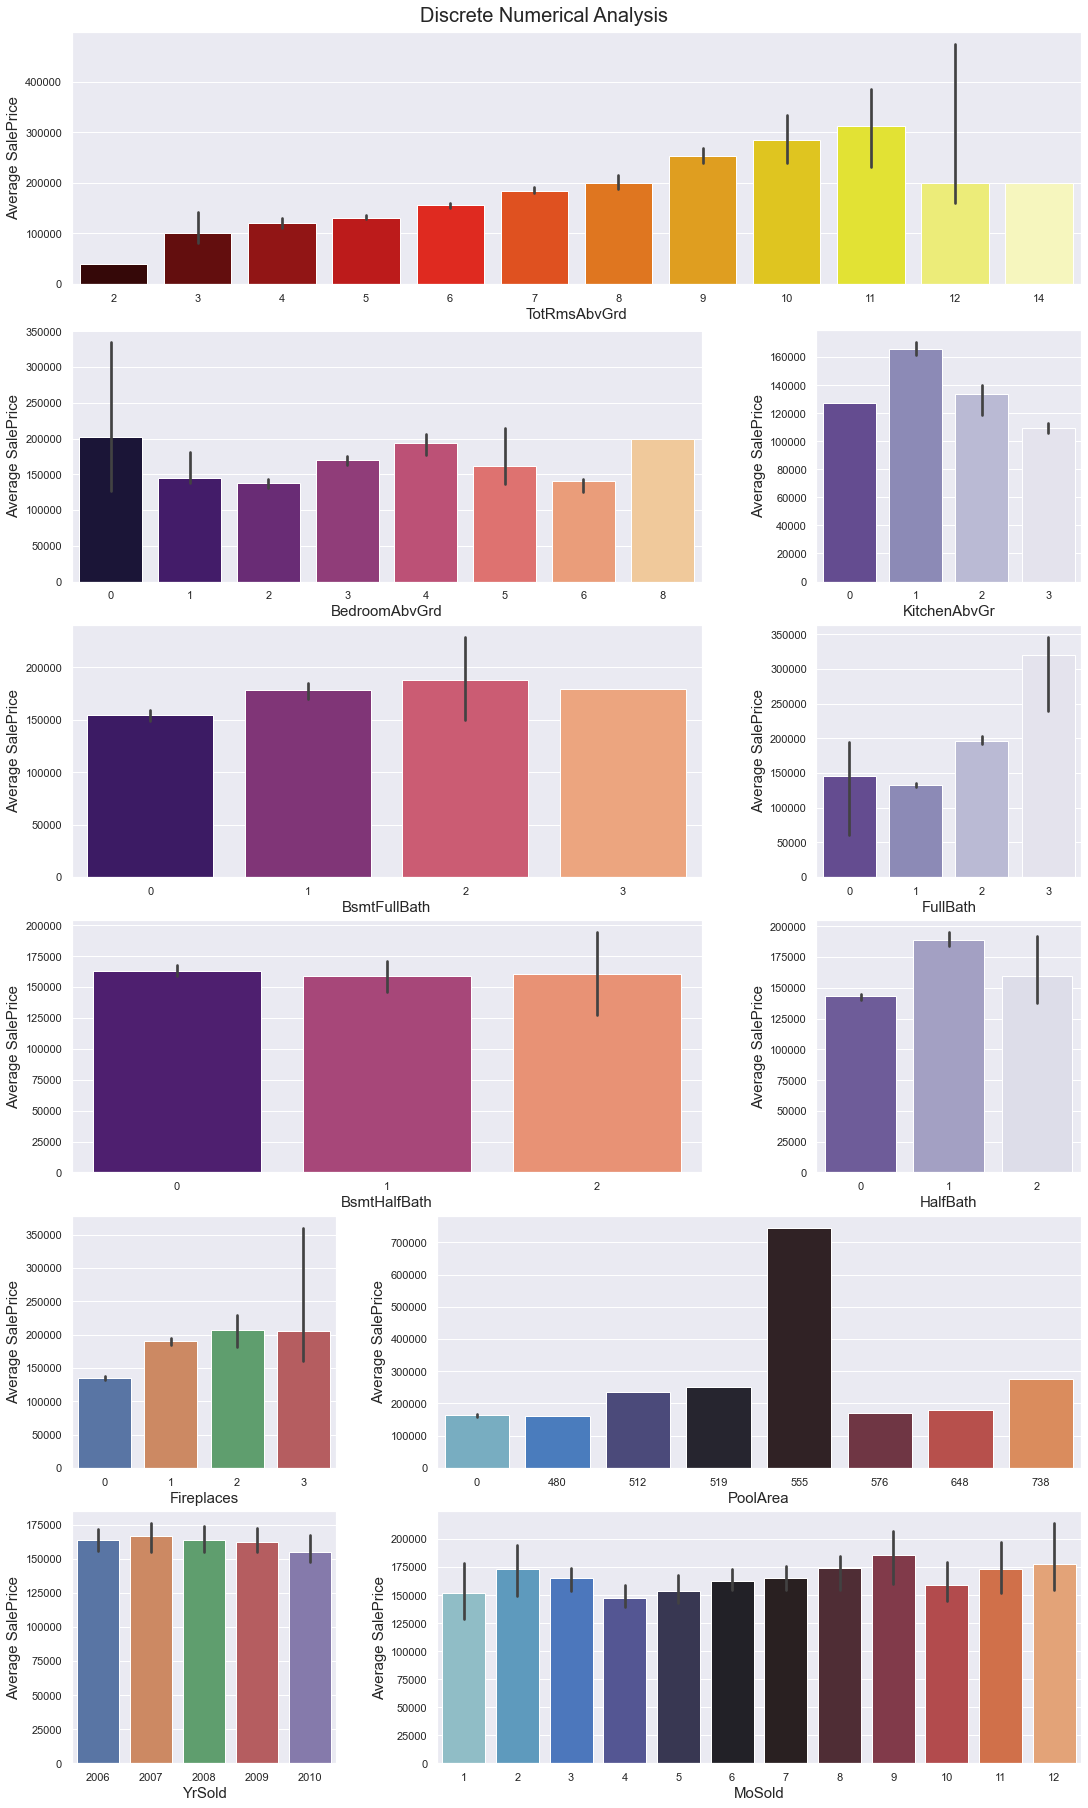

In [101]:
from numpy import median

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=df,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=df,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=df,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=df,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=df,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=df,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=df,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=df,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=df,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=df,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=df,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis",fontsize=20);

* Total Rooms Above Ground :- As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
* Bedroom Above Ground :- Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
* Kitchen Above ground :- Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
* InBasemnt Full bathroomsandBasement Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
* Now if we don't consider basement rooms,i.e Above grade Full Bathrooms and Half bathrooms .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.
* Fireplaces :- As fireplaces will increase in the house , sale price will also increase.
* PoolArea :- Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
* Year Sold :- The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.
* Month Sold :- There is not much to study about which month the house sold has higher or lower Sale Price.

#### Now we can analyze the rest of the continuous numerical features

In [102]:
#Here we create a list of all the numerical features in our dataset.
#And we have already separated the discrete features.
#But we separate year features , as we will study them later.
num = []

for col in df.columns:
    if df[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [103]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


* We'll have a look at the correlation between all the features with the help of Heatmap.
* Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e Sale Price.
* As there are a lot of features , we'll take 10 features at a time for better visual analysis.

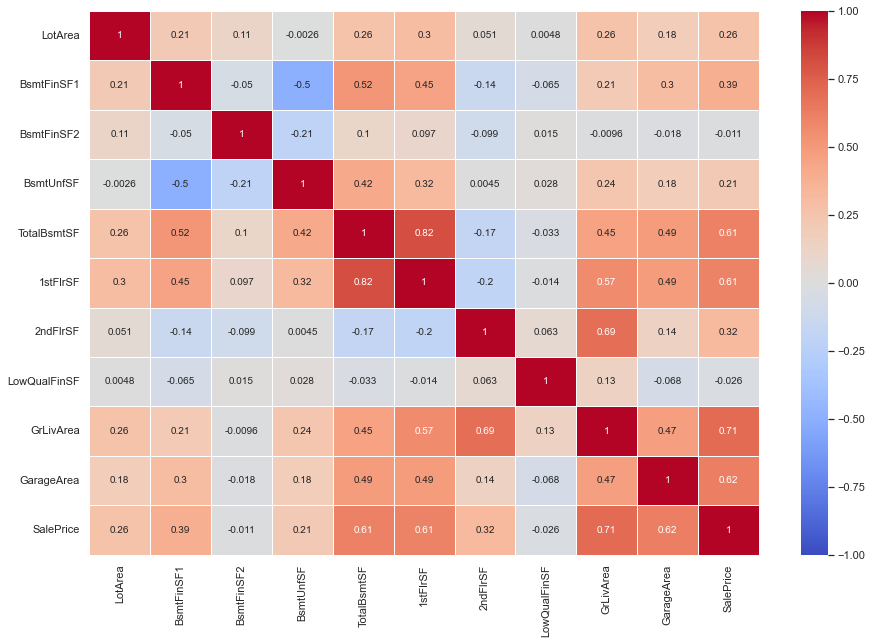

In [105]:
#First ten features

df_corr = df[num].iloc[:,0:10]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

* Among the first 10 numerical features,
* Above Ground Living Area sq ft is having a positive correlation of 0.71 with Sale Price which is obvious.
* Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
* We also expect LotArea to have a better correlation with Sale Price as increase in LotArea may also increase price of the house.
* We can see two features have negative correlation with SalePrice.
* BsmtFinSF2 [-0.011]
* LowQualFinSF [-0.026]

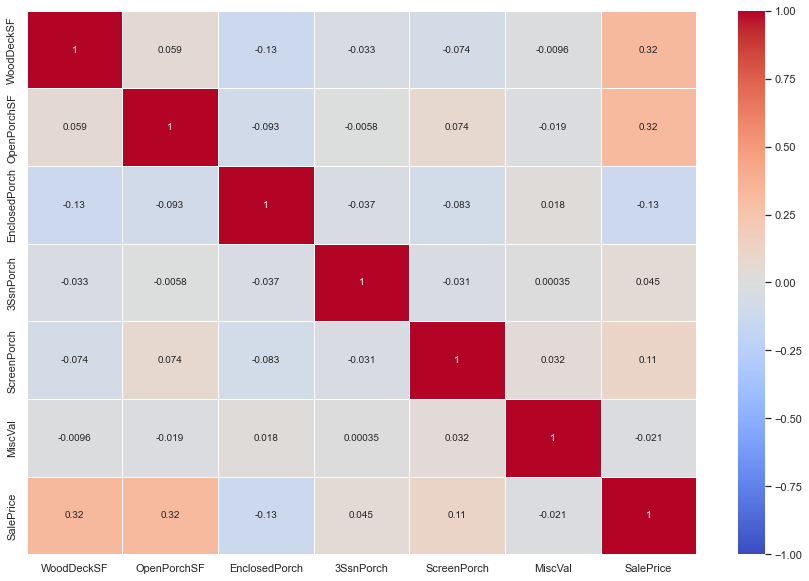

In [107]:
#Next features

df_corr = df[num].iloc[:,10:]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

* In the next ten features , Garage Area has a positive correlation of 0.62 with Sale Price.
* FullBath is having a positive correlation of 0.56.
* TotRmsAbvGrd feature has a 0.53 correlation with SalePrice.
* So in numerical features,